All instructions are provided for R. I am going to reproduce them in Python as best as I can.

# Preface

From the textbook, p. 370:
> At the end of Section 9.6.1, it is claimed that in the case of data that is just barely linearly separable, a support vector classifier with a small value of cost that misclassifies a couple of training observations may perform better on test data than one with a huge value of cost that does not misclassify any training observations. You will now
investigate this claim.

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate, train_test_split


sns.set()
%matplotlib inline

# (a)

From the textbook, p. 370:
> Generate two-class data with $p = 2$ in such a way that the classes are just barely linearly separable.

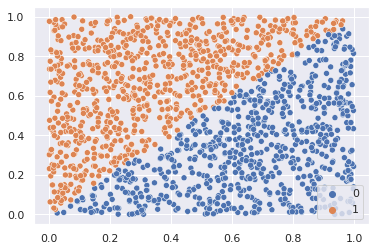

In [2]:
np.random.seed(1)
x = np.random.uniform(size=(2000, 2))
y = np.where(x[:, 1] > x[:, 0], 1, 0)
x_train, x_test, y_train, y_test = train_test_split(x, y)
sns.scatterplot(x=x_train[:, 0], y=x_train[:, 1], hue=y_train)

# (b)

From the textbook, p. 371:
> Compute the cross-validation error rates for support vector classifiers with a range of cost values. How many training errors are misclassified for each value of cost considered, and how does this relate to the cross-validation errors obtained?

In [3]:
C_range = np.append(np.linspace(0.01, 10, 20), 100000)
cv_errs = []
train_errs = []
for C in C_range:
  linear_svm = SVC(kernel='linear', C=C)
  cv_score = cross_validate(linear_svm, x_train, y_train)['test_score'].mean()
  cv_errs.append(1 - cv_score)

  linear_svm.fit(x_train, y_train)
  train_score = linear_svm.score(x_train, y_train)
  train_errs.append(1 - train_score)

In [4]:
df = pd.DataFrame({'C' : C_range
                   , 'train_err' : train_errs
                   , 'cv_err' : cv_errs
                  })
df

,C,train_err,cv_err
0,0.010000,0.032000,0.044667
1,0.535789,0.005333,0.006000
2,1.061579,0.005333,0.004667
3,1.587368,0.004000,0.008000
4,2.113158,0.004667,0.007333
5,2.638947,0.003333,0.006667
6,3.164737,0.001333,0.005333
7,3.690526,0.003333,0.004667
8,4.216316,0.004000,0.004000
9,4.742105,0.004000,0.004667


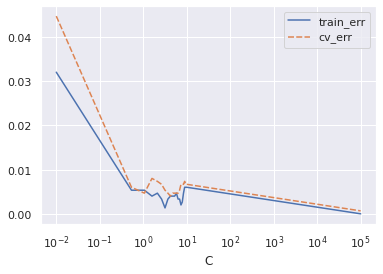

In [5]:
sns.lineplot(data=df.set_index('C'))
plt.xscale('log')

In general, cross-validation error is higher than training error.

# (c)

From the textbook, p. 371:
> Generate an appropriate test data set, and compute the test errors corresponding to each of the values of cost considered. Which value of cost leads to the fewest test errors, and how does this compare to the values of cost that yield the fewest training errors and the fewest cross-validation errors?

In [8]:
test_errs = []
for C in C_range:
  model = SVC(kernel='linear', C=C)
  model.fit(x_train, y_train)
  test_errs.append(1 - model.score(x_test, y_test))

df['test_err'] = test_errs
df

,C,train_err,cv_err,test_err
0,0.010000,0.032000,0.044667,0.040
1,0.535789,0.005333,0.006000,0.010
2,1.061579,0.005333,0.004667,0.008
3,1.587368,0.004000,0.008000,0.006
4,2.113158,0.004667,0.007333,0.006
5,2.638947,0.003333,0.006667,0.006
6,3.164737,0.001333,0.005333,0.004
7,3.690526,0.003333,0.004667,0.006
8,4.216316,0.004000,0.004000,0.006
9,4.742105,0.004000,0.004667,0.006


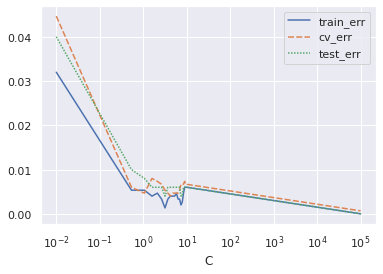

In [9]:
sns.lineplot(data=df.set_index('C'))
plt.xscale('log')

# (d)

From the textbook, p. 371:
> Discuss your results.

I'm sorry but the initial statement seems to be false (at least in this case). All errors are at their lowest with $C = 100000$.